# Information on KPI's



## Cost of living index
### The cost of living indices provided on this website are relative to New York City (NYC), with a baseline index of 100% for NYC.

Here's a breakdown of each index and its meaning:

Cost of Living Index (Excl. Rent): This index indicates the relative prices of consumer goods like groceries, restaurants, transportation, and utilities. It excludes accommodation expenses such as rent or mortgage. For instance, a city with a Cost of Living Index of 120 is estimated to be 20% more expensive than New York City (excluding rent).
Rent Index: This index estimates the prices of renting apartments in a city compared to New York City. If the Rent Index is 80, it suggests that the average rental prices in that city are approximately 20% lower than those in New York City.
Groceries Index: This index provides an estimation of grocery prices in a city relative to New York City. Numbeo uses item weights from the "Markets" section to calculate this index for each city.
Restaurants Index: This index compares the prices of meals and drinks in restaurants and bars to those in NYC.
Cost of Living Plus Rent Index: This index estimates consumer goods prices, including rent, in comparison to New York City.
Local Purchasing Power: This index indicates the relative purchasing power in a given city based on the average net salary. A domestic purchasing power of 40 means that residents with an average salary can afford, on average, 60% less goods and services compared to residents of New York City with an average salary.

## Quality if life index
### Quality of Life Index is an estimation of the overall quality of life in a city or country.It takes into account various factors that impact one's quality of life, including purchasing power, pollution levels, housing affordability, cost of living, safety, healthcare quality, commute times, and climate conditions. The index is designed to provide a comparative measure, where a higher index value indicates a better quality of life.

It's important to note that the Quality of Life Index is based on data and user surveys collected by Numbeo. The surveys capture the perceptions and experiences of visitors to the website regarding various aspects of quality of life. Numbeo strives to provide accurate and up-to-date information by filtering out potential spam and ensuring a sufficient number of contributors for each city or country.

The index is calculated using an empirical formula that assigns weights to each factor based on its importance. The specific formula used by Numbeo may vary and is subject to change. It combines the data collected for each factor to generate a numerical value that represents the quality of life in a particular location.

The Quality of Life Index (higher is better) is an estimation of the overall quality of life by using an empirical formula that takes into account the following factors:

Purchasing Power Index (higher is better)
Pollution Index (lower is better)
House Price to Income Ratio (lower is better)
Cost of Living Index (lower is better)
Safety Index (higher is better)
Health Care Index (higher is better)
Traffic Commute Time Index (lower is better)
Climate Index (higher is better)
For detailed information on the calculation of each of these indices used in the Quality of Life Index, please refer to their respective pages using the provided links above.

Current formula (written in Java programming language)*:

index.main = Math.max(0, 100 + purchasingPowerInclRentIndex / 2.5 - (housePriceToIncomeRatio * 1.0) - costOfLivingIndex / 10 + safetyIndex / 2.0 + healthIndex / 2.5 - trafficTimeIndex / 2.0 - pollutionIndex * 2.0 / 3.0 + climateIndex / 3.0);

## Property price Index
### Price to Income Ratio is a fundamental measure for apartment purchase affordability, where a lower ratio indicates better affordability. It is typically calculated as the ratio of median apartment prices to median familial disposable income, expressed as years of income (although variations are used also elsewhere). Our formula assumes and uses:

net disposable family income, as defined as 1.5 * the average net salary (50% is the assumed percentage of women in the workforce)
median apartment size is 90 square meters
price per square meter (the formula uses) is the average price of square meter in the city center and outside of the city center
Mortgage as Percentage of Income is a ratio of the actual monthly cost of the mortgage to take-home family income (lower is better). The average monthly salary is used to estimate family income. It assumes a 100% mortgage is taken on 20 years for the house(or apt) of 90 square meters which price per square meter is the average of prices in the city center and outside of the city center.

Loan Affordability Index is an inverse of mortgage as percentage of income. The used formula is : (100 / mortgage as percentage of income) (higher is better).

Price to Rent Ratio is the average cost of ownership divided by the received rent income (if buying to let) or the estimated rent that would be paid if renting (if buying to reside). Lower values suggest that it is better to buy rather than rent, and higher values suggest that it is better to rent rather than buy. Our formula to estimate rent per square meter assumes 1 bedroom apt has 50 square meters and 3 bedroom apartment has 110 square meters. It doesn't take into account taxes or maintenance fees.

Gross Rental Yield is the total yearly gross rent divided by the house price (expressed in percentages). Higher is better.

The code which calculates these numbers is currently as follows, so that you can check it out on your own:

  public double calculateMedianHousePriceOutsideOfCentre() {
    return getBuyPricePerSquareMeterOutsideOfCentre() * 90;
  }

  public double calculateMedianHousePriceCityCentre() {
    return getBuyPricePerSquareMeterCityCentre() * 90;
  }

  public double calculateMedianHousePrice() {
    return (calculateMedianHousePriceCityCentre() + calculateMedianHousePriceOutsideOfCentre()) / 2;
  }

  public double calculateHousePriceToIncomeRatio() {
    return calculateMedianHousePrice() / calculateMedianFamilyDisposableIncomeYearly();
  }

  double calculateMonthlyPaymentFor20YearsMontgage() {
    double monthlyInterestRate = (getCreditInterestRateAnnual()  / 12) / 100;
    double leaseAmount = calculateMedianHousePrice();
    double monthlyPayment = leaseAmount / ( (1 - (1 / Math.pow(1 + monthlyInterestRate, 240))) / monthlyInterestRate);
    return monthlyPayment;
  }

  public double calculateMortgagePercentageOfIncome() {
    return calculateMonthlyPaymentFor20YearsMontgage() / calculateMedianFamilyDisposableIncomeMonthly() * 100;
  }

  public double calculateAffordabilityIndex() {
    return 100 / calculateMortgagePercentageOfIncome();
  }
  
  public double calculateAverageYearlyRentPerSquareMeterCityCentre() {
    return (getRent50SqmCityCentre() / 50 + getRent110SqmCityCentre() / 110) / 2.0 * 12.0;
  }

  public double calculateAverageYearlyRentPerSquareMeterOutsideOfCentre() {
    return (getRent50SqmOutsideCentre() / 50 + getRent110SqmOutsideCentre() / 110) / 2.0 * 12.0;
  }

  public double calculatePriceToRentRatioCityCentre() {
    return getBuyPricePerSquareMeterCityCentre() / calculateAverageYearlyRentPerSquareMeterCityCentre();
  }

  public double calculatePriceToRentRatioOusideOfCentre() {
    return getBuyPricePerSquareMeterOutsideOfCentre() / calculateAverageYearlyRentPerSquareMeterOutsideOfCentre();
  }

  public double calculateGrossRentalYieldCityCentre() {
    return calculateAverageYearlyRentPerSquareMeterCityCentre() / getBuyPricePerSquareMeterCityCentre() * 100;
  }

  public double calculateGrossRentalYieldOutsideOfCentre() {
    return calculateAverageYearlyRentPerSquareMeterOutsideOfCentre() / getBuyPricePerSquareMeterOutsideOfCentre() * 100;
  }

## Nett Migration

# Data Engineering

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
import re

pd.set_option('display.max_columns', None)

In [2]:
import pandas as pd

def load_csvs(file_paths):
    dataframes = []
    for path in file_paths:
        try:
            df = pd.read_csv(path)
            dataframes.append(df)
            print(f"Loaded {path} successfully.")
        except FileNotFoundError:
            print(f"File {path} not found.")
        except Exception as e:
            print(f"An error occurred while loading {path}: {e}")
    return dataframes

if __name__ == "__main__":
    # List of file paths
    file_paths = [r"C:\Users\paude\Documents\00. Backup 2023\EXTERIOR\MASTER\MA IAAC\03. Cursada\01. Modulo 03\S01 DE\Class Project\DE_Team\modified_csvs\cities_kpis_final2.csv",
                  r"C:\Users\paude\Documents\00. Backup 2023\EXTERIOR\MASTER\MA IAAC\03. Cursada\01. Modulo 03\S01 DE\Class Project\DE_Team\merged_csvs\merged_filled3.csv",
                  r"C:\Users\paude\Documents\00. Backup 2023\EXTERIOR\MASTER\MA IAAC\03. Cursada\01. Modulo 03\S01 DE\Class Project\DE_Team\merged_csvs\cities_missing_data.csv"
                ]

    # Load CSV files into dataframes
    all_cities_kpi = load_csvs(file_paths)

Loaded C:\Users\paude\Documents\00. Backup 2023\EXTERIOR\MASTER\MA IAAC\03. Cursada\01. Modulo 03\S01 DE\Class Project\DE_Team\modified_csvs\cities_kpis_final2.csv successfully.
Loaded C:\Users\paude\Documents\00. Backup 2023\EXTERIOR\MASTER\MA IAAC\03. Cursada\01. Modulo 03\S01 DE\Class Project\DE_Team\merged_csvs\merged_filled3.csv successfully.
Loaded C:\Users\paude\Documents\00. Backup 2023\EXTERIOR\MASTER\MA IAAC\03. Cursada\01. Modulo 03\S01 DE\Class Project\DE_Team\merged_csvs\cities_missing_data.csv successfully.


In [3]:
# Define datasets
kpis_clean = all_cities_kpi[0]
kpis_initial = all_cities_kpi[1]
cities_missing_data = all_cities_kpi[2]

In [4]:
# drop columns 1

# Columns to drop
columns_to_drop_first_set = [
    'Rank_x', 'Cost of Living Plus Rent Index',
    'Restaurant Price Index', 'Rank_y',
    'Rank', 'key', 'Cost of Living Index_y'
]

# Drop the columns
kpis_clean.drop(columns=columns_to_drop_first_set, inplace=True)

kpis_clean.head()

,City,Country_x,Lat,Lng,iso2,iso3,Population,ID,Cost of Living Index_x,Rent Index,Groceries Index,Local Purchasing Power Index,Price To Income Ratio,Gross Rental Yield City Centre,Gross Rental Yield Outside of Centre,Price To Rent Ratio City Centre,Price To Rent Ratio Outside Of City Centre,Mortgage As A Percentage Of Income,Affordability Index,Quality of Life Index,Purchasing Power Index,Safety Index,Health Care Index,Property Price to Income Ratio,Traffic Commute Time Index,Pollution Index,Climate Index,Net migration (thousands)
0,'Ain Abessa,Algeria,36.3000,5.2950,DZ,DZA,16770.0,1.012074e+09,32.3,5.4,39.4,25.3,25.5,2.5,2.7,40.2,36.9,225.8,0.4,150.2,92.9,57.9,67.5,12.2,36.1,49.8,77.7,-19
1,'Ain Abid,Algeria,36.2325,6.9440,DZ,DZA,31743.0,1.012018e+09,32.3,5.4,39.4,25.3,25.5,2.5,2.7,40.2,36.9,225.8,0.4,150.2,92.9,57.9,67.5,12.2,36.1,49.8,77.7,-19
2,'Ain Arnat,Algeria,36.1833,5.3167,DZ,DZA,43551.0,1.012453e+09,32.3,5.4,39.4,25.3,25.5,2.5,2.7,40.2,36.9,225.8,0.4,150.2,92.9,57.9,67.5,12.2,36.1,49.8,77.7,-19
3,'Ain Azel,Algeria,35.8433,5.5219,DZ,DZA,48487.0,1.012746e+09,32.3,5.4,39.4,25.3,25.5,2.5,2.7,40.2,36.9,225.8,0.4,150.2,92.9,57.9,67.5,12.2,36.1,49.8,77.7,-19
4,'Ain Babouche,Algeria,35.9411,7.1856,DZ,DZA,16129.0,1.012031e+09,32.3,5.4,39.4,25.3,25.5,2.5,2.7,40.2,36.9,225.8,0.4,150.2,92.9,57.9,67.5,12.2,36.1,49.8,77.7,-19


In [5]:
# Columns to drop
columns_to_drop_second_set = [
    'Price To Income Ratio', 'Price To Rent Ratio City Centre',
    'Price To Rent Ratio Outside Of City Centre',
    'Property Price to Income Ratio'
]

# Drop the columns
kpis_clean.drop(columns=columns_to_drop_second_set, inplace=True)

kpis_clean.head(50)


,City,Country_x,Lat,Lng,iso2,iso3,Population,ID,Cost of Living Index_x,Rent Index,Groceries Index,Local Purchasing Power Index,Gross Rental Yield City Centre,Gross Rental Yield Outside of Centre,Mortgage As A Percentage Of Income,Affordability Index,Quality of Life Index,Purchasing Power Index,Safety Index,Health Care Index,Traffic Commute Time Index,Pollution Index,Climate Index,Net migration (thousands)
0,'Ain Abessa,Algeria,36.3000,5.2950,DZ,DZA,16770.0,1.012074e+09,32.3,5.4,39.4,25.3,2.5,2.7,225.8,0.4,150.2,92.9,57.9,67.5,36.1,49.8,77.7,-19
1,'Ain Abid,Algeria,36.2325,6.9440,DZ,DZA,31743.0,1.012018e+09,32.3,5.4,39.4,25.3,2.5,2.7,225.8,0.4,150.2,92.9,57.9,67.5,36.1,49.8,77.7,-19
2,'Ain Arnat,Algeria,36.1833,5.3167,DZ,DZA,43551.0,1.012453e+09,32.3,5.4,39.4,25.3,2.5,2.7,225.8,0.4,150.2,92.9,57.9,67.5,36.1,49.8,77.7,-19
3,'Ain Azel,Algeria,35.8433,5.5219,DZ,DZA,48487.0,1.012746e+09,32.3,5.4,39.4,25.3,2.5,2.7,225.8,0.4,150.2,92.9,57.9,67.5,36.1,49.8,77.7,-19
4,'Ain Babouche,Algeria,35.9411,7.1856,DZ,DZA,16129.0,1.012031e+09,32.3,5.4,39.4,25.3,2.5,2.7,225.8,0.4,150.2,92.9,57.9,67.5,36.1,49.8,77.7,-19
5,'Ain Boucif,Algeria,35.8912,3.1585,DZ,DZA,24434.0,1.012875e+09,32.3,5.4,39.4,25.3,2.5,2.7,225.8,0.4,150.2,92.9,57.9,67.5,36.1,49.8,77.7,-19
6,'Ain Fekan,Algeria,35.2250,-0.0017,DZ,DZA,10573.0,1.012085e+09,32.3,5.4,39.4,25.3,2.5,2.7,225.8,0.4,150.2,92.9,57.9,67.5,36.1,49.8,77.7,-19
7,'Ain Kerma,Algeria,36.5939,8.2011,DZ,DZA,12182.0,1.012696e+09,32.3,5.4,39.4,25.3,2.5,2.7,225.8,0.4,150.2,92.9,57.9,67.5,36.1,49.8,77.7,-19
8,'Ain Kihal,Algeria,35.2044,-1.1961,DZ,DZA,9589.0,1.012358e+09,32.3,5.4,39.4,25.3,2.5,2.7,225.8,0.4,150.2,92.9,57.9,67.5,36.1,49.8,77.7,-19
9,'Ain Leuh,Morocco,33.2833,-5.3833,MA,MAR,9669.0,1.504669e+09,32.0,9.6,30.0,30.1,5.5,5.7,120.2,0.8,150.2,92.9,57.9,67.5,36.1,49.8,77.7,-46


In [6]:
# Count the number of unique cities
unique_city_count = len(kpis_clean['City'].unique())
print(f"Number of unique cities: {unique_city_count}")

Number of unique cities: 39603


In [7]:
# Step 1: Identify the cities in kpis_initial that are repeated
repeated_cities = list(kpis_initial['City'].unique())
print(len(repeated_cities))

# Step 2: Filter kpis_clean to exclude these repeated cities
filtered_df_01 = kpis_clean[kpis_clean['City'].isin(repeated_cities)].copy()
filtered_df_02 = kpis_clean[~kpis_clean['City'].isin(repeated_cities)].copy()

393


In [8]:
# Keep most populated cities only
filtered_df_02_sorted= filtered_df_02.sort_values(by=['Country_x', 'Population'], ascending=[True, False])
# Group by 'Country_x' and keep the first two values of 'Population' for each group
top_6_populations = filtered_df_02_sorted.groupby('Country_x').head(6)

filtered_df_02_sorted.head()

,City,Country_x,Lat,Lng,iso2,iso3,Population,ID,Cost of Living Index_x,Rent Index,Groceries Index,Local Purchasing Power Index,Gross Rental Yield City Centre,Gross Rental Yield Outside of Centre,Mortgage As A Percentage Of Income,Affordability Index,Quality of Life Index,Purchasing Power Index,Safety Index,Health Care Index,Traffic Commute Time Index,Pollution Index,Climate Index,Net migration (thousands)
9907,Durres,Albania,41.3133,19.4458,AL,ALB,175110.0,1.008174e+09,44.6,13.1,42.2,31.5,4.5,5.6,135.1,0.7,94.8,38.5,58.7,47.8,39.0,87.0,86.4,-11
37487,Vlore,Albania,40.4667,19.4833,AL,ALB,130827.0,1.008276e+09,44.6,13.1,42.2,31.5,4.5,5.6,135.1,0.7,94.8,38.5,58.7,47.8,39.0,87.0,86.4,-11
16312,Kamez,Albania,41.3833,19.7667,AL,ALB,126777.0,1.008149e+09,44.6,13.1,42.2,31.5,4.5,5.6,135.1,0.7,94.8,38.5,58.7,47.8,39.0,87.0,86.4,-11
11111,Fier,Albania,40.7250,19.5572,AL,ALB,120655.0,1.008293e+09,44.6,13.1,42.2,31.5,4.5,5.6,135.1,0.7,94.8,38.5,58.7,47.8,39.0,87.0,86.4,-11
32229,Shkoder,Albania,42.0681,19.5119,AL,ALB,112276.0,1.008978e+09,44.6,13.1,42.2,31.5,4.5,5.6,135.1,0.7,94.8,38.5,58.7,47.8,39.0,87.0,86.4,-11


In [9]:
clean_appended_cities_kpi= top_6_populations
initial_cities_kpi= filtered_df_01

In [10]:
# Concatenate the two dataframes
combined_df = pd.concat([clean_appended_cities_kpi, initial_cities_kpi])

# Sort the combined dataframe by 'Country' and 'Population'
migration_database = combined_df.sort_values(by=['Country_x', 'Population'], ascending=[True, False])

# Display the sorted combined dataframe
migration_database.head()

,City,Country_x,Lat,Lng,iso2,iso3,Population,ID,Cost of Living Index_x,Rent Index,Groceries Index,Local Purchasing Power Index,Gross Rental Yield City Centre,Gross Rental Yield Outside of Centre,Mortgage As A Percentage Of Income,Affordability Index,Quality of Life Index,Purchasing Power Index,Safety Index,Health Care Index,Traffic Commute Time Index,Pollution Index,Climate Index,Net migration (thousands)
35242,Tirana,Albania,41.3289,19.8178,AL,ALB,418495.0,1.008162e+09,44.6,13.1,42.2,31.5,4.5,5.6,135.1,0.7,94.8,38.5,58.7,47.8,39.0,87.0,86.4,-11
9907,Durres,Albania,41.3133,19.4458,AL,ALB,175110.0,1.008174e+09,44.6,13.1,42.2,31.5,4.5,5.6,135.1,0.7,94.8,38.5,58.7,47.8,39.0,87.0,86.4,-11
37487,Vlore,Albania,40.4667,19.4833,AL,ALB,130827.0,1.008276e+09,44.6,13.1,42.2,31.5,4.5,5.6,135.1,0.7,94.8,38.5,58.7,47.8,39.0,87.0,86.4,-11
16312,Kamez,Albania,41.3833,19.7667,AL,ALB,126777.0,1.008149e+09,44.6,13.1,42.2,31.5,4.5,5.6,135.1,0.7,94.8,38.5,58.7,47.8,39.0,87.0,86.4,-11
11111,Fier,Albania,40.7250,19.5572,AL,ALB,120655.0,1.008293e+09,44.6,13.1,42.2,31.5,4.5,5.6,135.1,0.7,94.8,38.5,58.7,47.8,39.0,87.0,86.4,-11


In [11]:
#add language variable and net migration per city
cities_missing_data.drop(columns=["City"], inplace= True)

# Assuming cities_missing_data and sorted_combined_df are your DataFrames

# Reset the index of both DataFrames before concatenating
migration_database.reset_index(drop=True, inplace=True)
cities_missing_data.reset_index(drop=True, inplace=True)

# Concatenate based on matching values in the "City" column
migration_database = pd.concat([migration_database, cities_missing_data], axis=1)
migration_database.drop(columns=["Net migration (thousands)"], inplace= True)

# Now, result contains the concatenated DataFrame
migration_database.head()

,City,Country_x,Lat,Lng,iso2,iso3,Population,ID,Cost of Living Index_x,Rent Index,Groceries Index,Local Purchasing Power Index,Gross Rental Yield City Centre,Gross Rental Yield Outside of Centre,Mortgage As A Percentage Of Income,Affordability Index,Quality of Life Index,Purchasing Power Index,Safety Index,Health Care Index,Traffic Commute Time Index,Pollution Index,Climate Index,Net_migration,First_language,Second_language,external_migration_destination
0,Tirana,Albania,41.3289,19.8178,AL,ALB,418495.0,1.008162e+09,44.6,13.1,42.2,31.5,4.5,5.6,135.1,0.7,94.8,38.5,58.7,47.8,39.0,87.0,86.4,1.38,Albanian,Greek,Italy
1,Durres,Albania,41.3133,19.4458,AL,ALB,175110.0,1.008174e+09,44.6,13.1,42.2,31.5,4.5,5.6,135.1,0.7,94.8,38.5,58.7,47.8,39.0,87.0,86.4,0.98,Albanian,Greek,Italy
2,Vlore,Albania,40.4667,19.4833,AL,ALB,130827.0,1.008276e+09,44.6,13.1,42.2,31.5,4.5,5.6,135.1,0.7,94.8,38.5,58.7,47.8,39.0,87.0,86.4,0.51,Albanian,Greek,Italy
3,Kamez,Albania,41.3833,19.7667,AL,ALB,126777.0,1.008149e+09,44.6,13.1,42.2,31.5,4.5,5.6,135.1,0.7,94.8,38.5,58.7,47.8,39.0,87.0,86.4,0.62,Albanian,Greek,Italy
4,Fier,Albania,40.7250,19.5572,AL,ALB,120655.0,1.008293e+09,44.6,13.1,42.2,31.5,4.5,5.6,135.1,0.7,94.8,38.5,58.7,47.8,39.0,87.0,86.4,0.65,Albanian,Greek,Italy


In [12]:
# to do list 28/05/24

# spline interpolation

# metric noise smoothness of interpolated data

# create weights!! so every feature affectsf inal score differetnly
# do lil research on what 

# plot correlation map

In [13]:
# Initialize empty lists to store categorical and numerical column names
categorical_cols = []
numerical_cols = []

# Iterate through columns of the DataFrame
for column in migration_database.columns:
    # Check if the column dtype is object (categorical)
    if migration_database[column].dtype == 'object':
        categorical_cols.append(column)
    # Check if the column dtype is numeric (int or float)
    elif migration_database[column].dtype in ['int64', 'float64']:
        numerical_cols.append(column)

# Print the lists
print("Categorical Columns:", categorical_cols)
print("Numerical Columns:", numerical_cols)


Categorical Columns: ['City', 'Country_x', 'iso2', 'iso3', 'First_language', 'Second_language', 'external_migration_destination']
Numerical Columns: ['Lat', 'Lng', 'Population', 'ID', 'Cost of Living Index_x', 'Rent Index', 'Groceries Index', 'Local Purchasing Power Index', 'Gross Rental Yield City Centre', 'Gross Rental Yield Outside of Centre', 'Mortgage As A Percentage Of Income', 'Affordability Index', 'Quality of Life Index', 'Purchasing Power Index', 'Safety Index', 'Health Care Index', 'Traffic Commute Time Index', 'Pollution Index', 'Climate Index', 'Net_migration']


In [14]:
# Get unique city values
unique_cities = migration_database['City'].unique().tolist()

# Write to a text file
with open('unique_cities.txt', 'w') as file:
    for city in unique_cities:
        file.write(f"{city}\n")

## PCA

In [15]:
# Select relevant numerical columns
numerical_columns = [
    'Population', 'Cost of Living Index_x', 'Rent Index', 'Groceries Index',
    'Local Purchasing Power Index', 'Gross Rental Yield City Centre',
    'Gross Rental Yield Outside of Centre', 'Mortgage As A Percentage Of Income',
    'Affordability Index', 'Quality of Life Index', 'Purchasing Power Index',
    'Safety Index', 'Health Care Index', 'Traffic Commute Time Index',
    'Pollution Index', 'Climate Index']

In [16]:
numerical_data = migration_database[numerical_columns].copy()
scaler = StandardScaler()
data_scaled = scaler.fit_transform(numerical_data)

In [17]:
# Apply PCA
pca = PCA()
pca.fit(data_scaled)
data_pca = pca.transform(data_scaled)

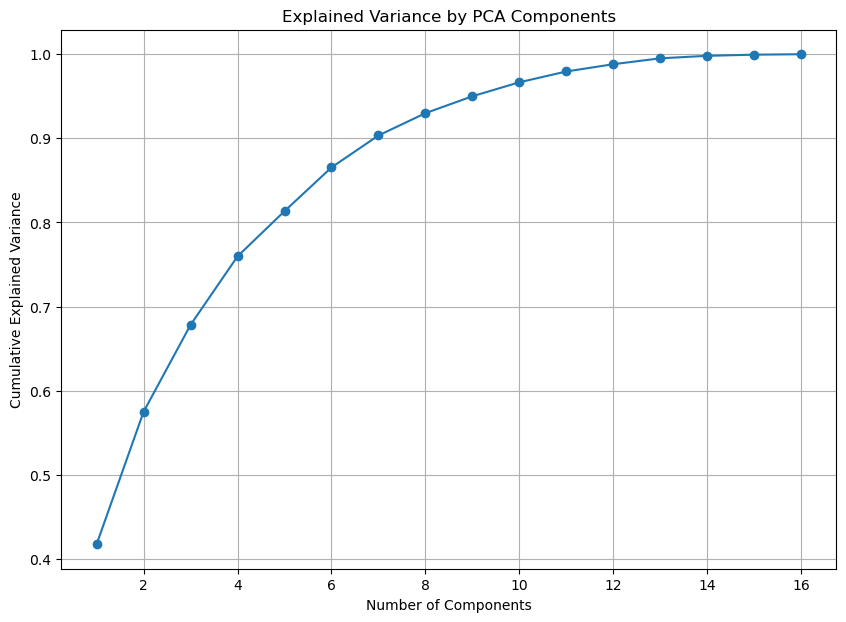

In [18]:
# Determine the number of components to keep
explained_variance = pca.explained_variance_ratio_.cumsum()

# Plot the explained variance
plt.figure(figsize=(10, 7))
plt.plot(range(1, len(explained_variance)+1), explained_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.grid(True)
plt.show()

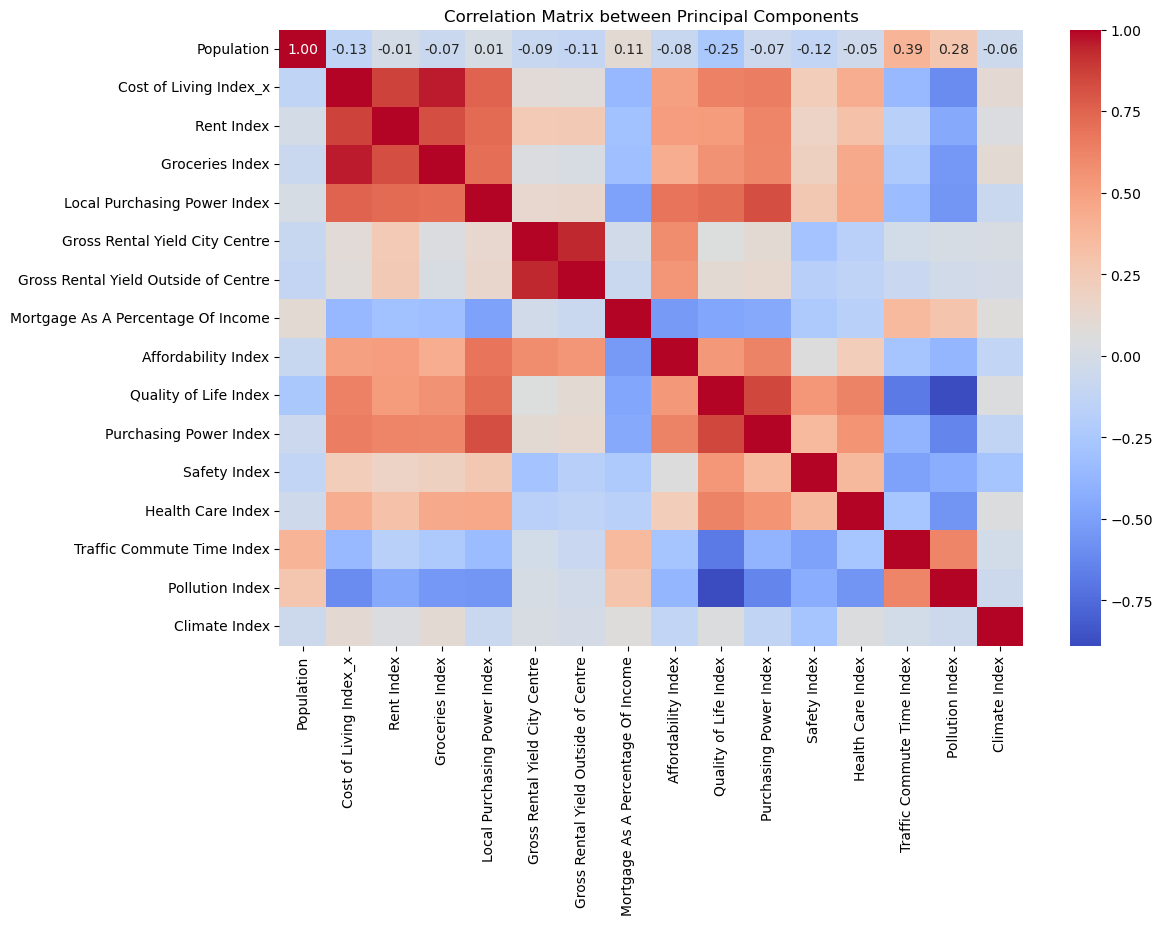

In [19]:
# Calculate the correlation matrix
correlation_matrix = migration_database[numerical_columns].corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix between Principal Components')
plt.show()

In [20]:
# Numerical Data
final_numerical = pd.DataFrame(data_scaled, columns=numerical_columns).reset_index()
final_numerical.drop(columns=['index'] ,inplace=True)

# final_numerical.head()

final_categorical = migration_database[['First_language','Second_language']].copy().reset_index()
final_categorical.drop(columns=['index'] ,inplace=True)

# final_categorical.head()

# join datafeames
final_modelling = pd.concat([final_categorical,final_numerical,migration_database['Net_migration'].reset_index()], axis=1)
final_modelling.drop(columns=['index'] ,inplace=True)
final_modelling.head()

,First_language,Second_language,Population,Cost of Living Index_x,Rent Index,Groceries Index,Local Purchasing Power Index,Gross Rental Yield City Centre,Gross Rental Yield Outside of Centre,Mortgage As A Percentage Of Income,Affordability Index,Quality of Life Index,Purchasing Power Index,Safety Index,Health Care Index,Traffic Commute Time Index,Pollution Index,Climate Index,Net_migration
0,Albanian,Greek,-0.326125,-0.300453,-0.637568,-0.321339,-0.935341,-0.341386,0.017426,-0.166909,-0.536245,-1.357925,-1.285989,0.018493,-2.073977,0.33061,1.781645,0.597642,1.38
1,Albanian,Greek,-0.389701,-0.300453,-0.637568,-0.321339,-0.935341,-0.341386,0.017426,-0.166909,-0.536245,-1.357925,-1.285989,0.018493,-2.073977,0.33061,1.781645,0.597642,0.98
2,Albanian,Greek,-0.401269,-0.300453,-0.637568,-0.321339,-0.935341,-0.341386,0.017426,-0.166909,-0.536245,-1.357925,-1.285989,0.018493,-2.073977,0.33061,1.781645,0.597642,0.51
3,Albanian,Greek,-0.402327,-0.300453,-0.637568,-0.321339,-0.935341,-0.341386,0.017426,-0.166909,-0.536245,-1.357925,-1.285989,0.018493,-2.073977,0.33061,1.781645,0.597642,0.62
4,Albanian,Greek,-0.403926,-0.300453,-0.637568,-0.321339,-0.935341,-0.341386,0.017426,-0.166909,-0.536245,-1.357925,-1.285989,0.018493,-2.073977,0.33061,1.781645,0.597642,0.65


In [21]:
# Join databases horizontally
# modelling_db = pd.concat([saudi_lb,egypt_lb,dubai_lb], axis=0)
modelling_db = final_modelling[~final_modelling['Net_migration'].isna()].copy()

# Define features & label
modelling_db['rand'] = np.random.choice(['train', 'test'], size=len(modelling_db), p=[0.8, 0.2])

# Encode categorical features
modelling_db = pd.get_dummies(modelling_db, columns=['First_language','Second_language']) #use for concatenated dfs


# Define train & test sets
features_list = [col for col in modelling_db.columns if col not in ['Net_migration','rand']]

X_train = modelling_db[features_list][modelling_db['rand']=='train'].copy()
X_test = modelling_db[features_list][modelling_db['rand']=='test'].copy()

y_train = modelling_db['Net_migration'][modelling_db['rand']=='train'].copy()
y_test = modelling_db['Net_migration'][modelling_db['rand']=='test'].copy()
 
av_train = np.average(y_train)
av_test = np.average(y_test)

In [23]:
# Initialize the model
model = RandomForestRegressor(n_estimators=50, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
predictions_train = model.predict(X_train)
predictions_test = model.predict(X_test)

# Evaluate the model
train_rmse = mean_squared_error(y_train, predictions_train, squared=False)/av_train
test_rmse = mean_squared_error(y_test, predictions_test, squared=False)/av_test

print(f"Train RMSE: {train_rmse:.2f}")
print(f"Test RMSE: {test_rmse:.2f}")


Train RMSE: -9.05
Test RMSE: 25.37


c:\Users\paude\miniconda3\envs\macad\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\paude\miniconda3\envs\macad\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [58]:
mean_squared_error(y_train, predictions_train, squared=False)

c:\Users\paude\miniconda3\envs\macad\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


ValueError: Found input variables with inconsistent numbers of samples: [799, 819]

In [48]:
residuals_train = (y_train-predictions_train)
residuals_test = (y_test - predictions_test)

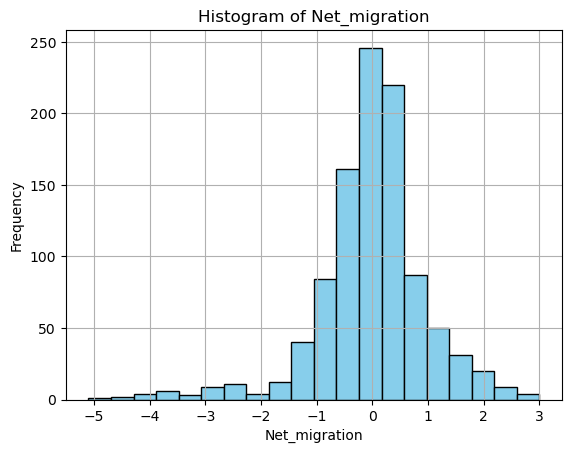

In [52]:
plt.hist(modelling_db['Net_migration'], bins=20, color='skyblue', edgecolor='black')  # Adjust the number of bins as needed
plt.title('Histogram of Net_migration')
plt.xlabel('Net_migration')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


c:\Users\paude\miniconda3\envs\macad\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


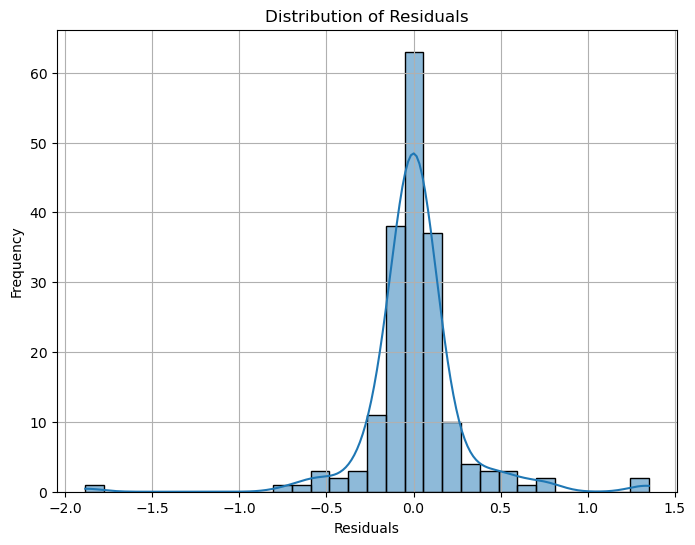

In [53]:
# X-axis (Residuals): This axis represents the values of the residuals, which are the differences between the observed (actual) values and the predicted values from the regression model. Each bar on the x-axis corresponds to a range of residual values
# Y-axis (Frequency): This axis represents the frequency of occurrence of the residuals within each range. It indicates how many data points fall into each range of residual values.
# Histogram Bars: The bars in the histogram represent the frequency of residuals falling within each range. The height of each bar indicates the number of data points with residuals within that range.
# A "correct" distribution of residuals plot should exhibit a symmetric bell-shaped curve, with the KDE curve closely following the histogram bars.The distribution should be approximately normal, indicating that the residuals are randomly and independently distributed around zero.

# Distribution of residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals_test, bins=30, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

C:\Users\paude\AppData\Local\Temp\ipykernel_15140\1090061915.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red')


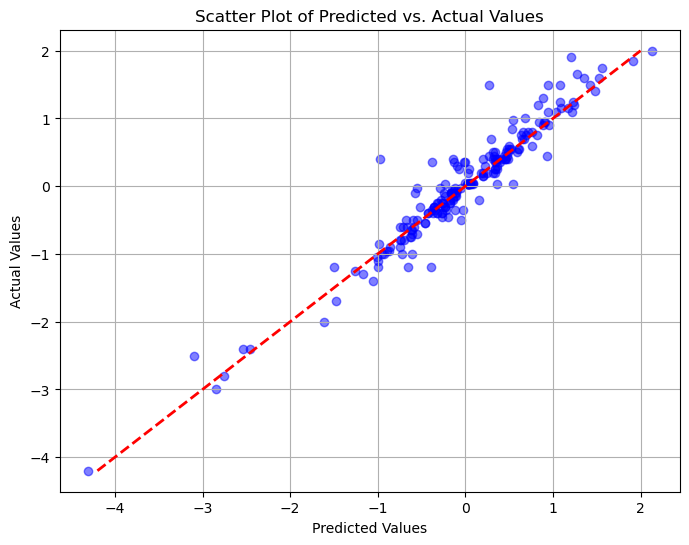

In [24]:
# Scatter plot of predicted vs. actual values
plt.figure(figsize=(8, 6))
plt.scatter(predictions_test, y_test, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red')
plt.title('Scatter Plot of Predicted vs. Actual Values')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.grid(True)
plt.show()



## plots (???)

### categorical

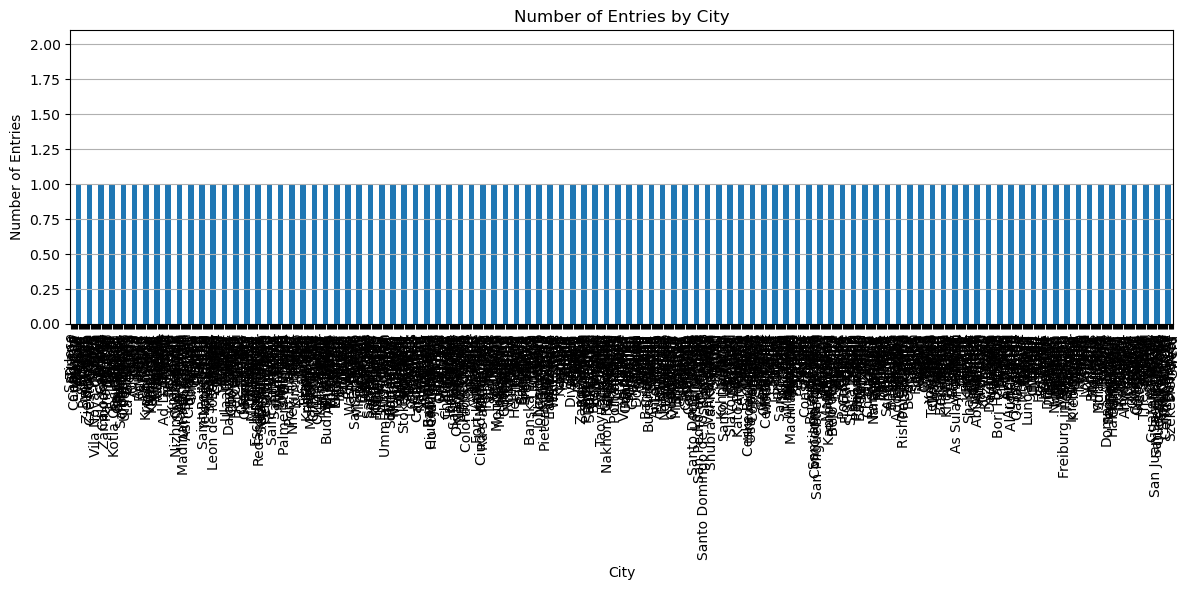

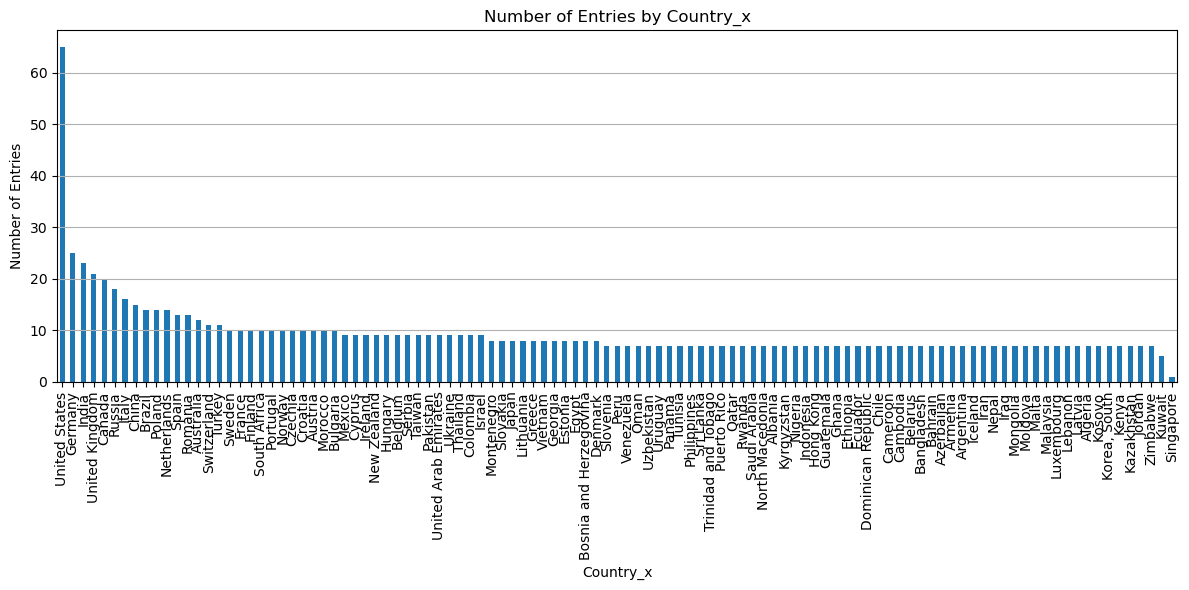

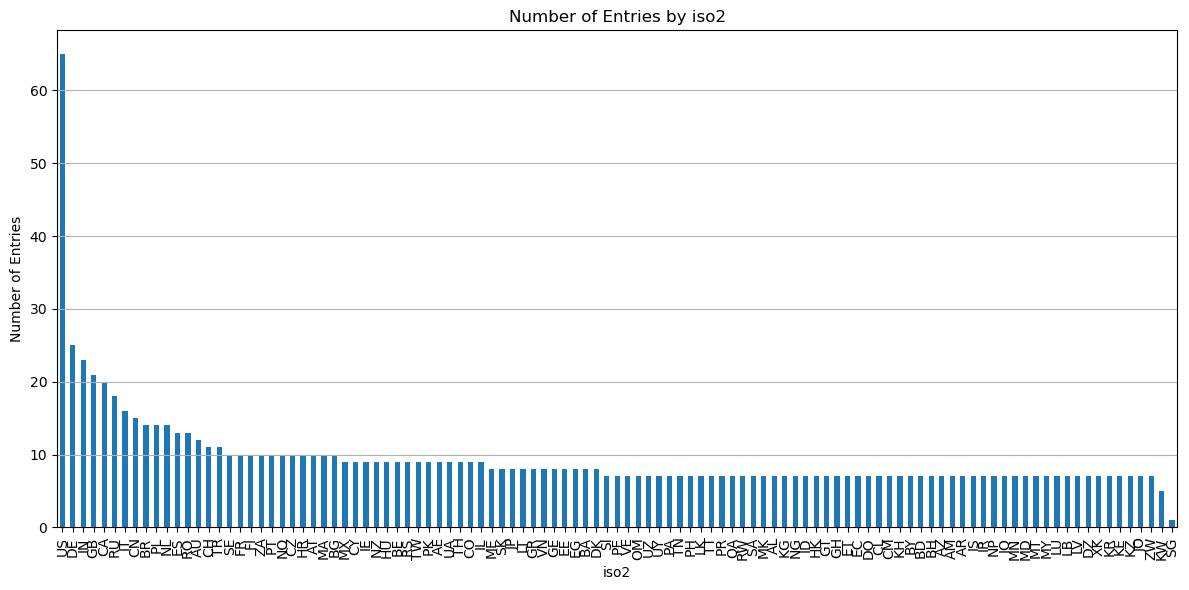

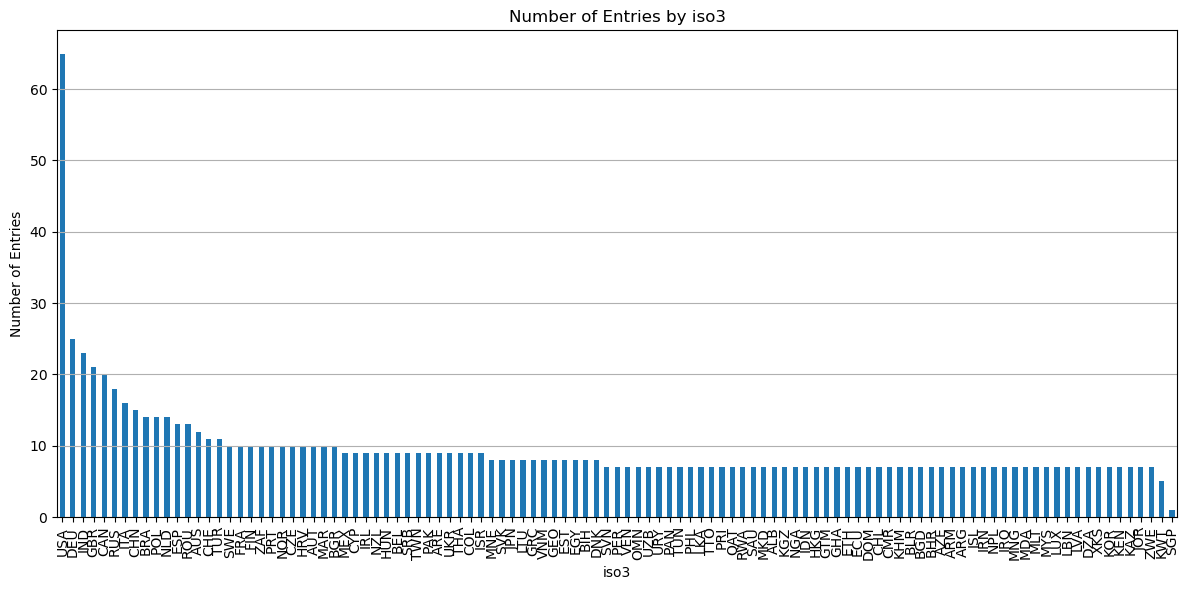

In [ ]:
# Iterate over each categorical column
for col in categorical_cols:
    # Group by the categorical column and count the number of entries for each category
    counts = result[col].value_counts()

    # Plot the bar plot
    plt.figure(figsize=(12, 6))
    counts.plot(kind='bar')
    plt.title(f'Number of Entries by {col}')
    plt.xlabel(col)
    plt.ylabel('Number of Entries')
    plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
    plt.grid(axis='y')  # Add gridlines along the y-axis
    plt.tight_layout()
    plt.show()

### numerical

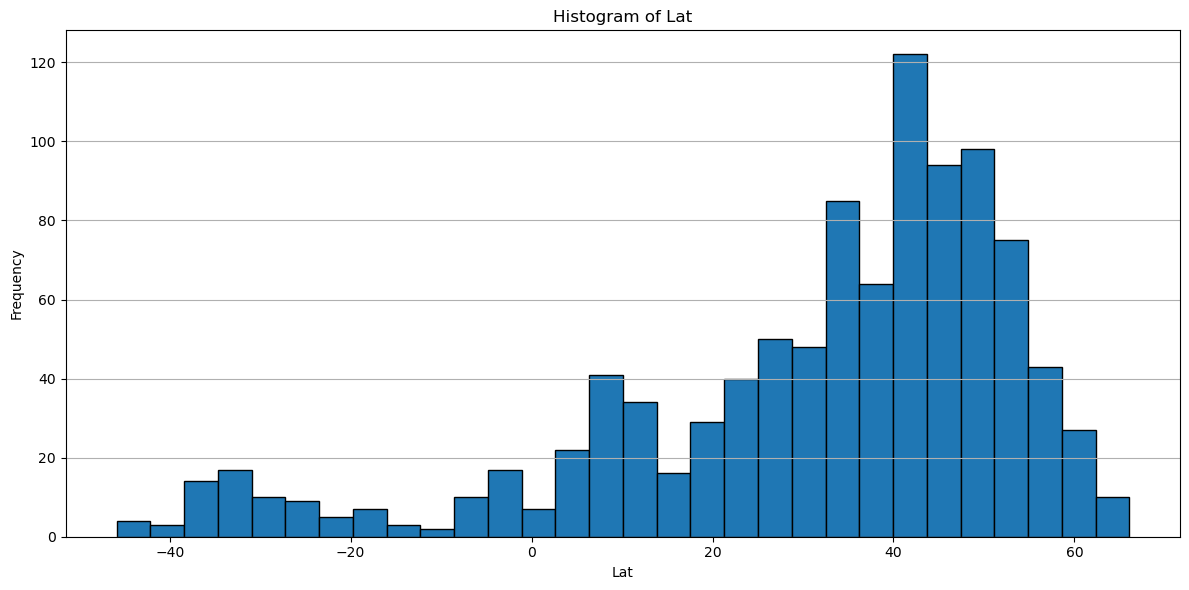

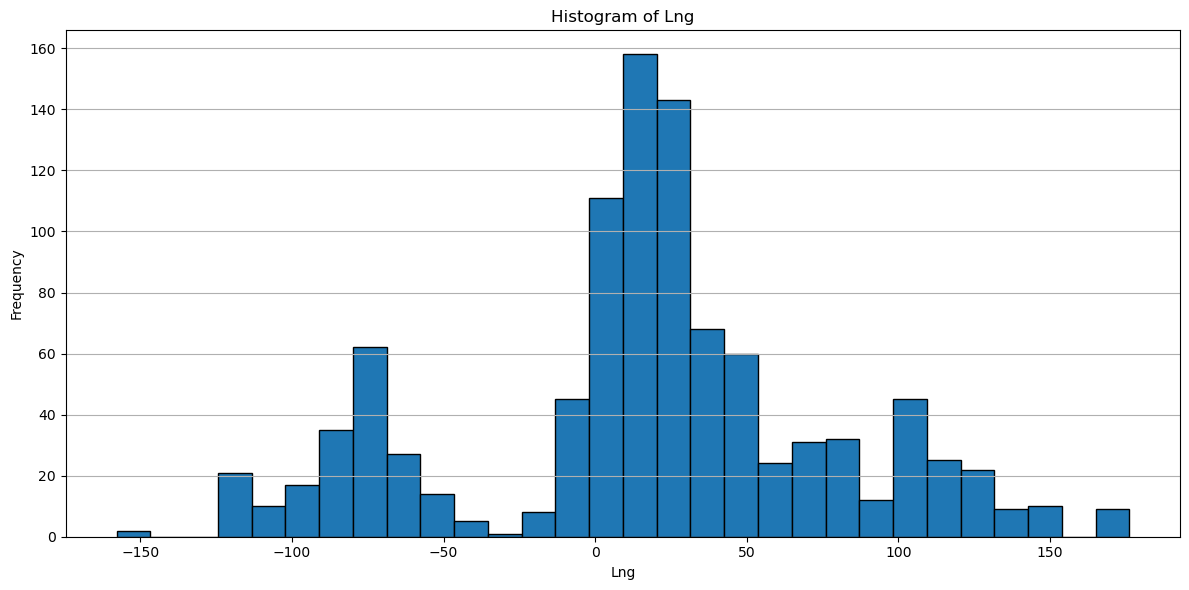

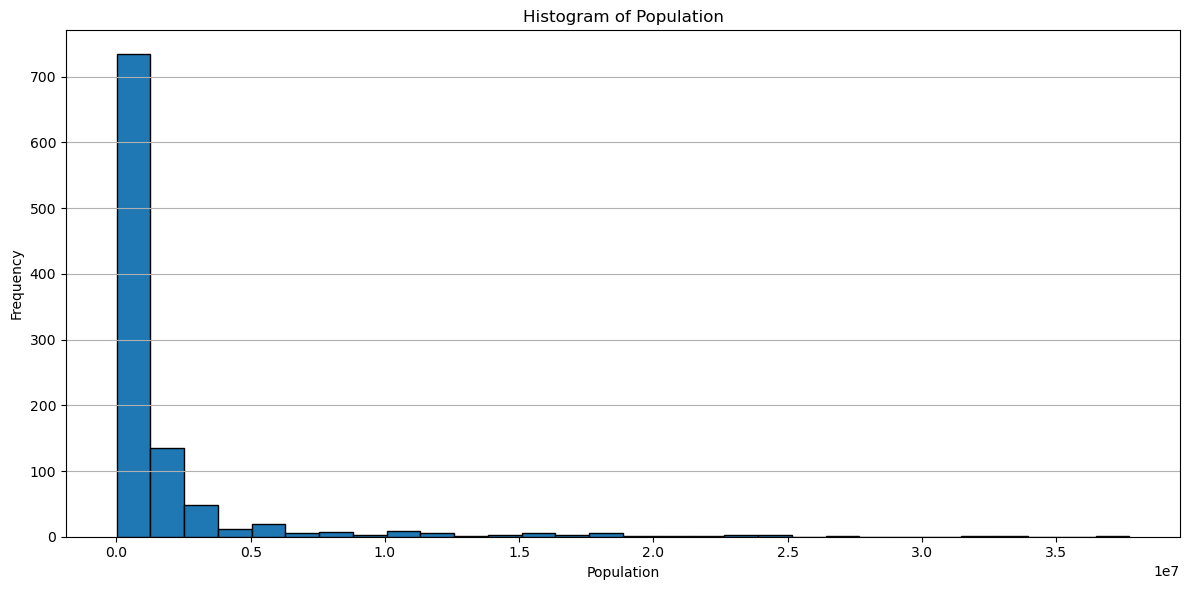

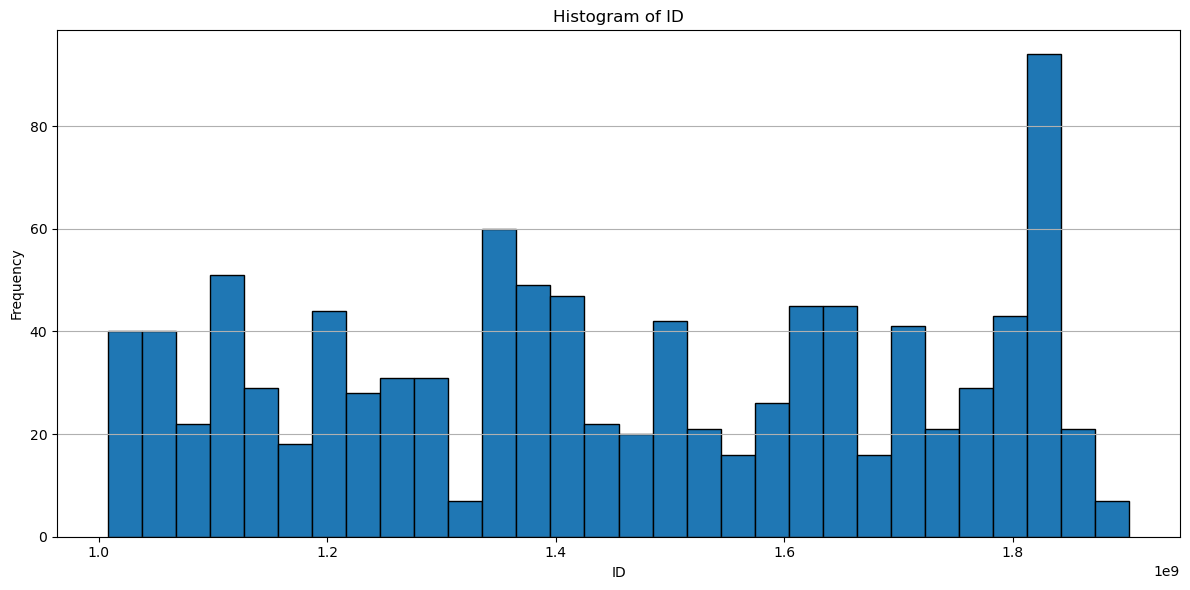

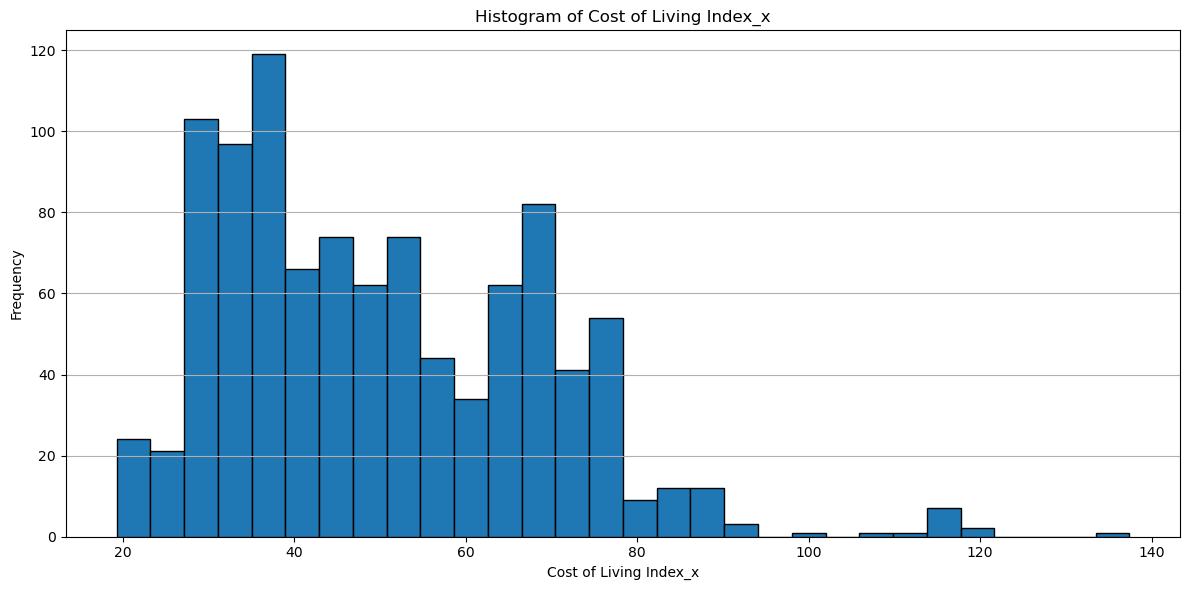

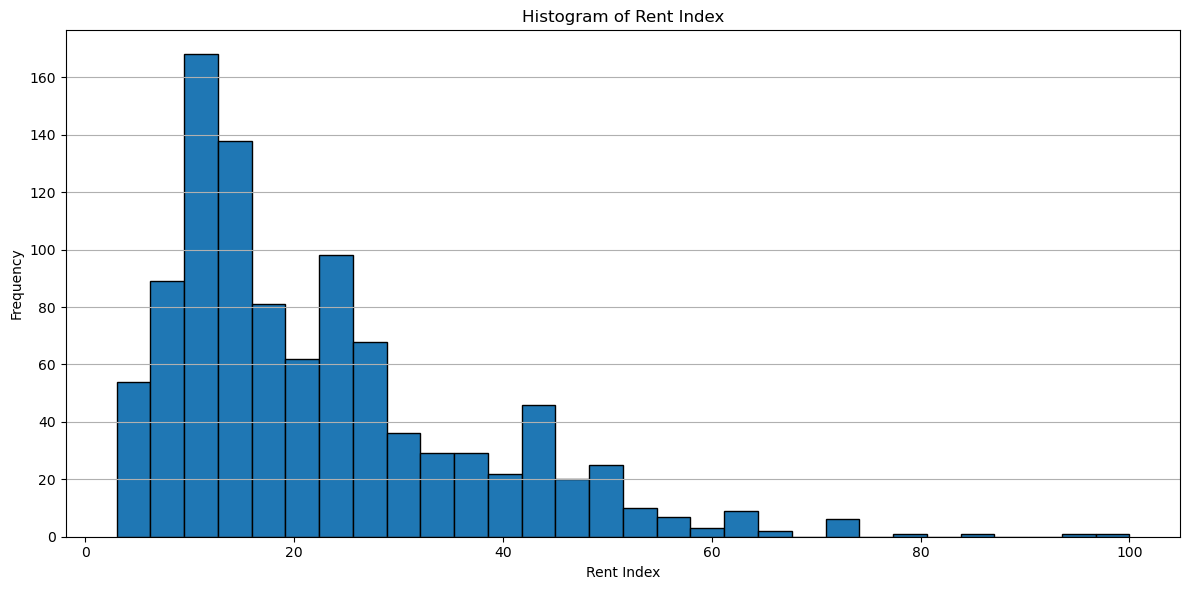

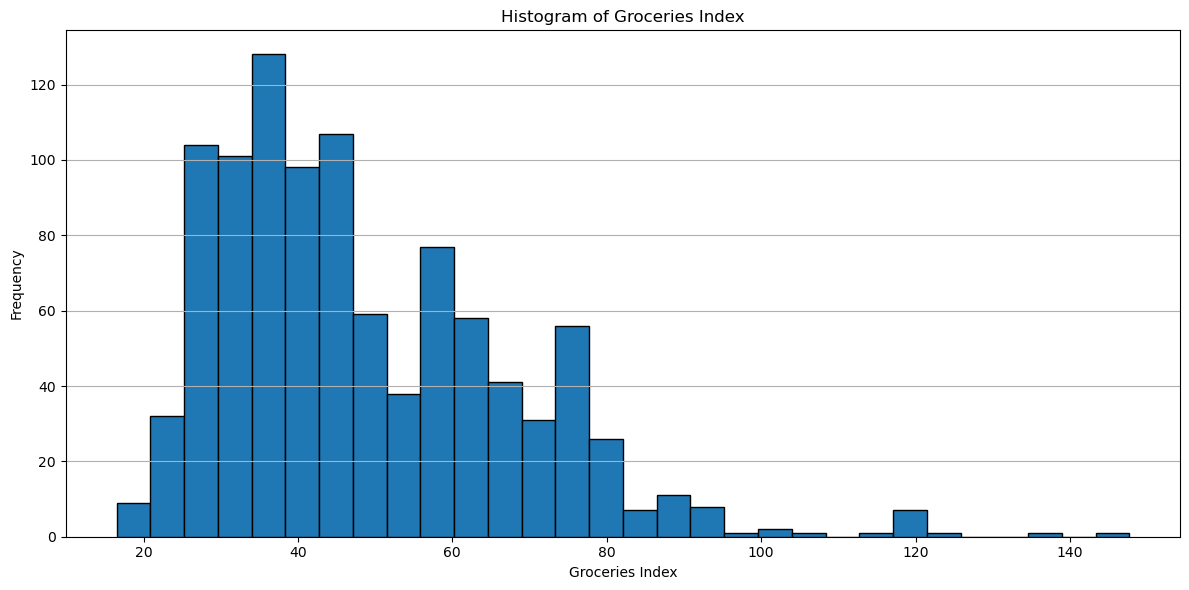

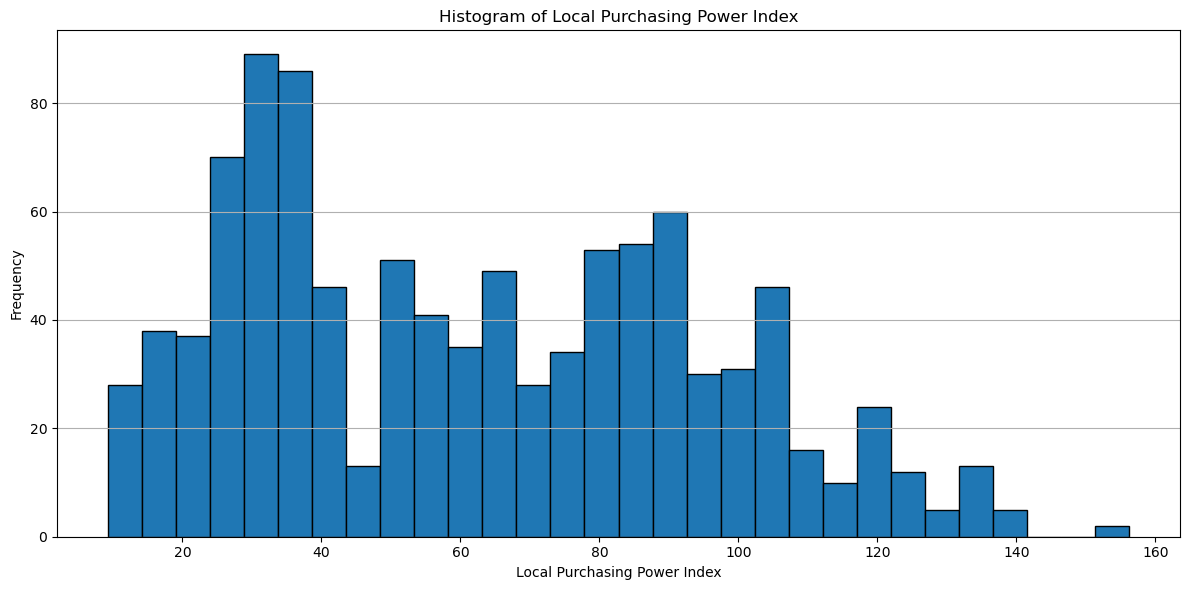

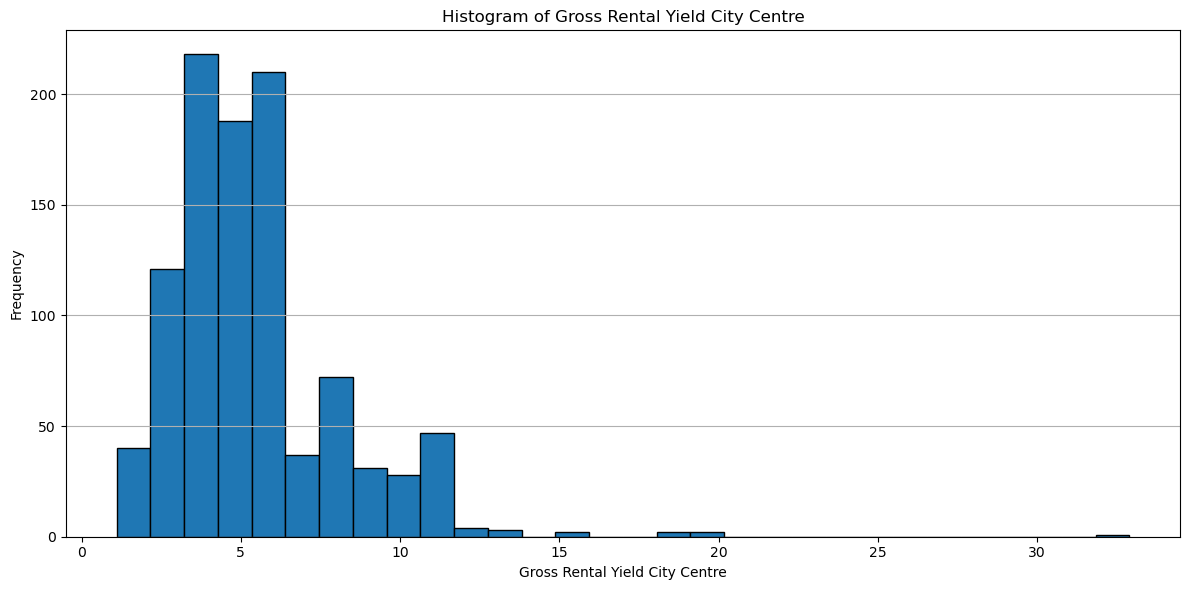

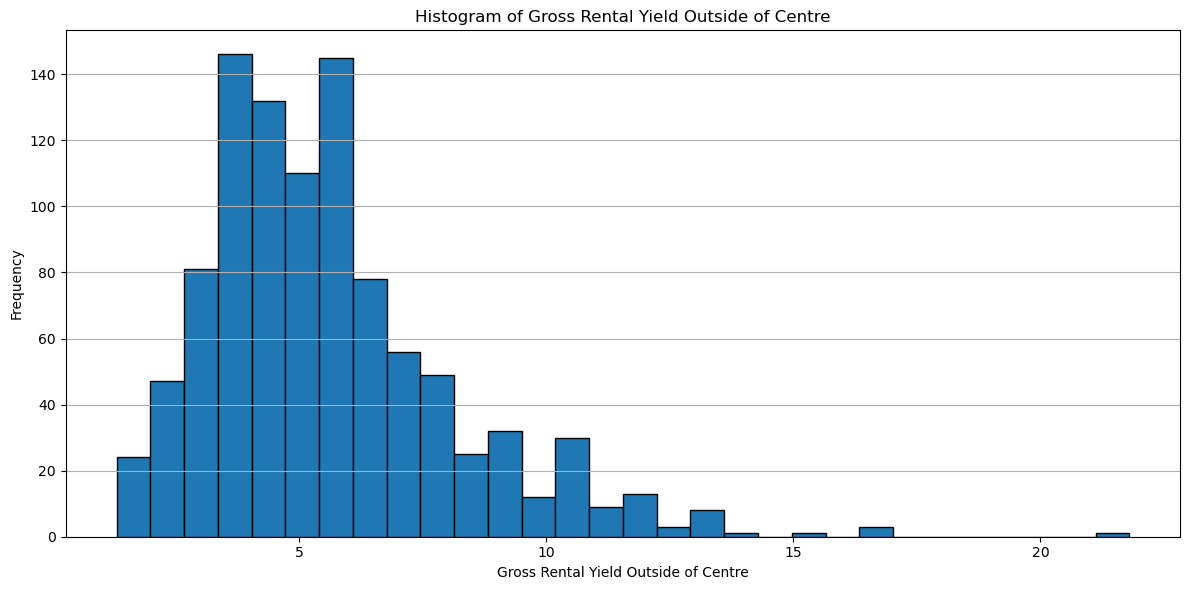

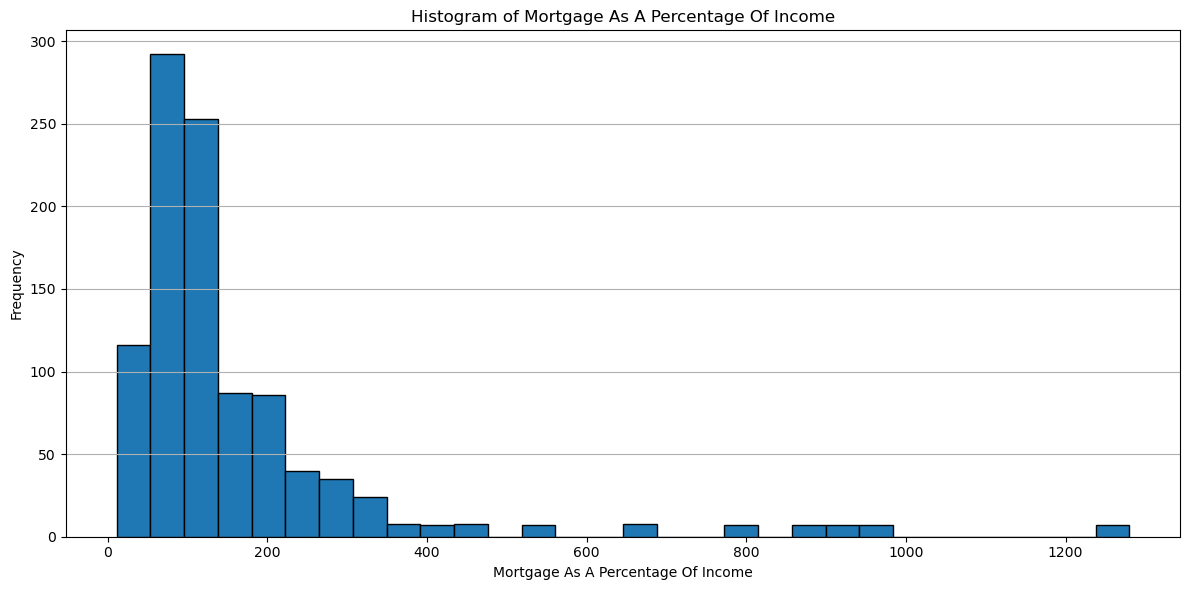

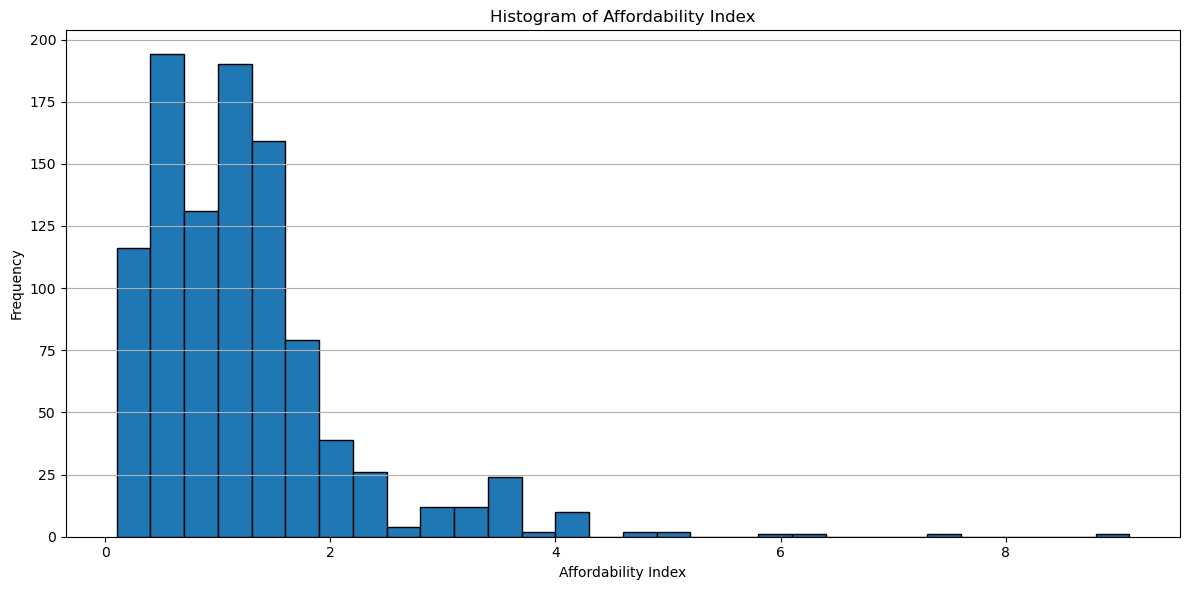

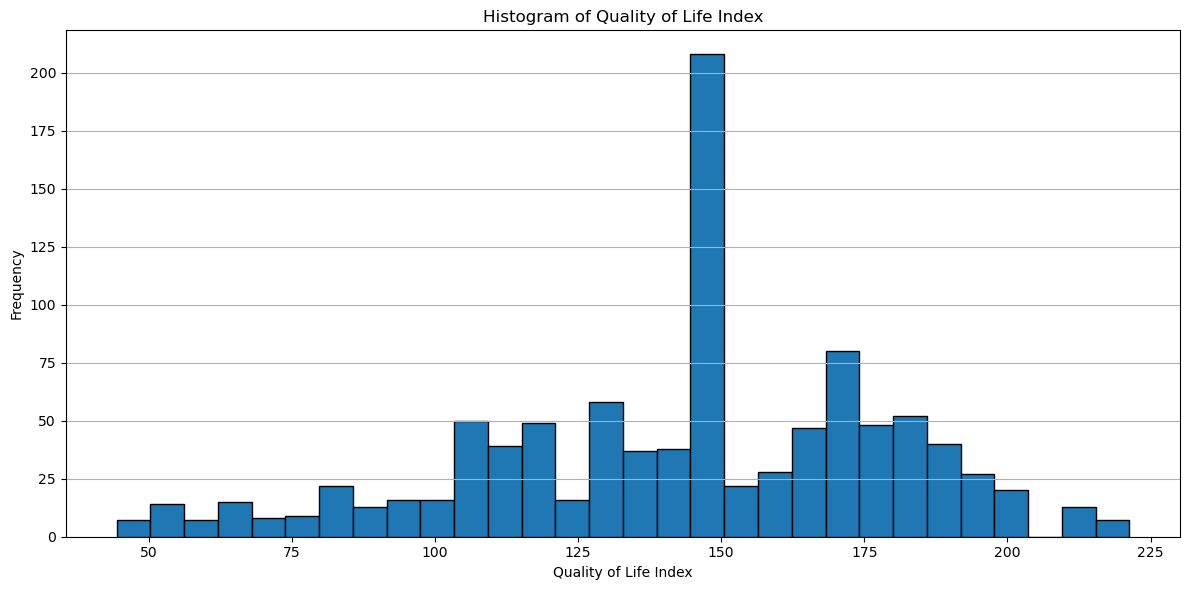

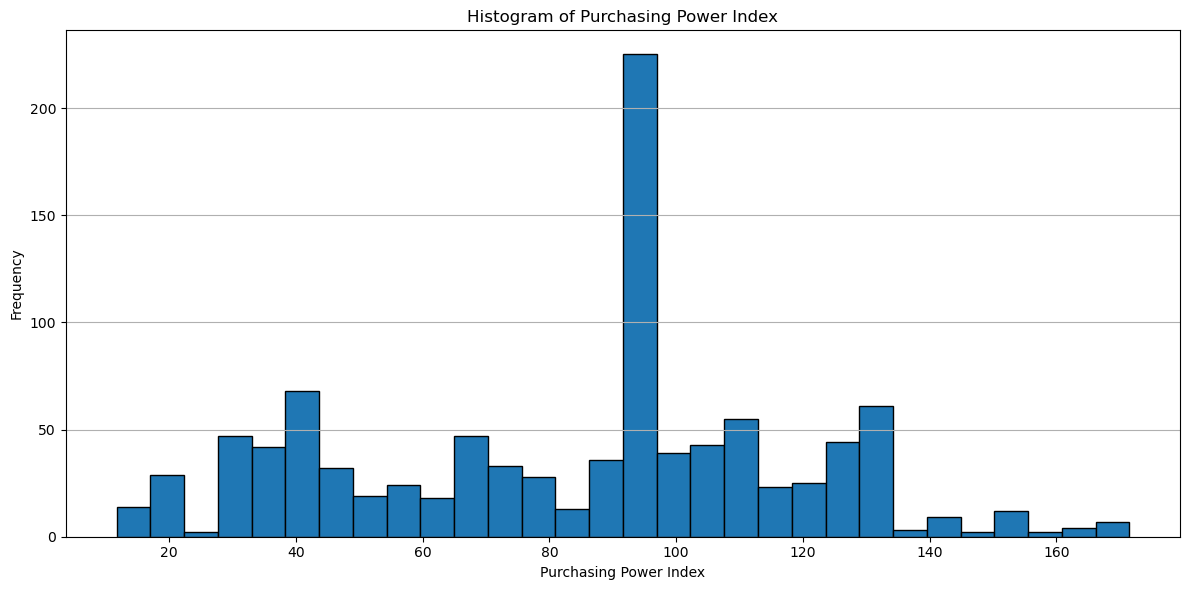

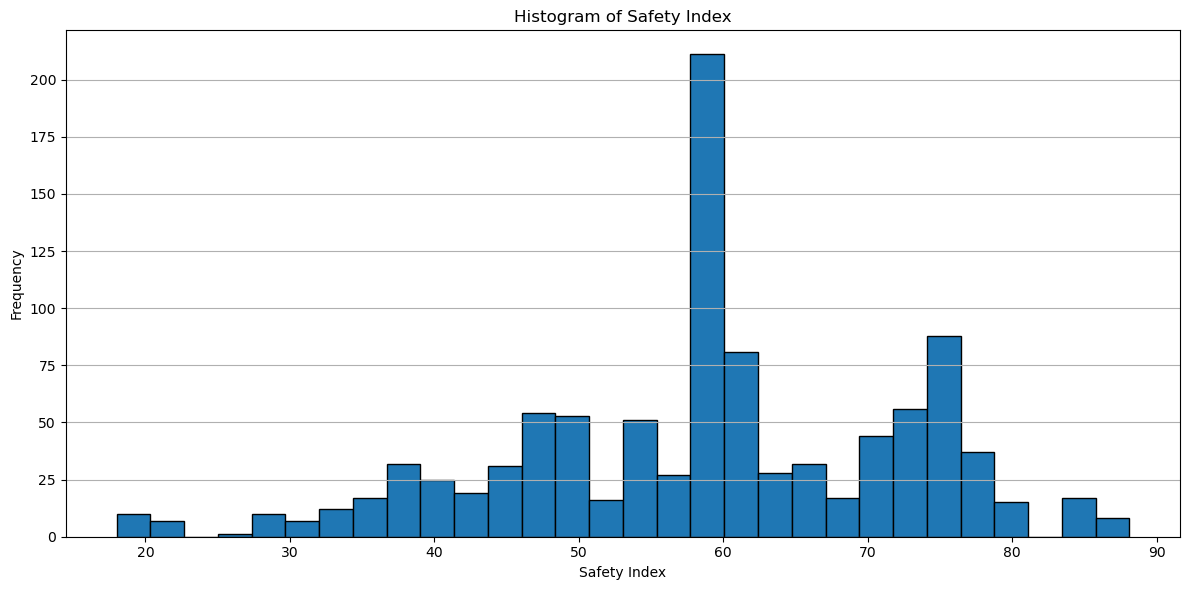

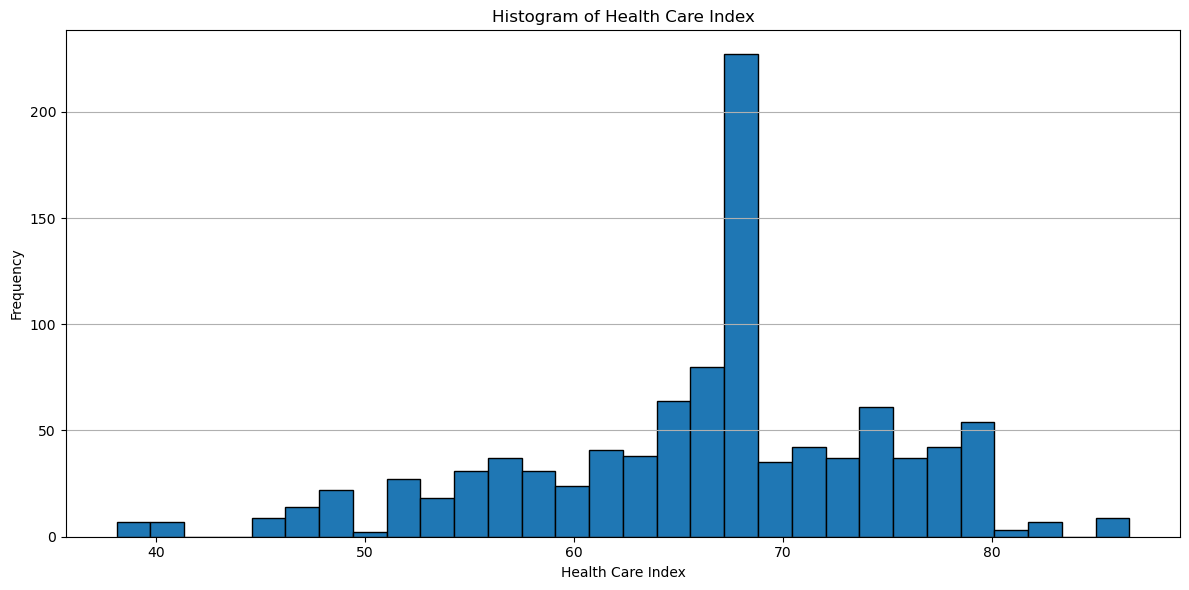

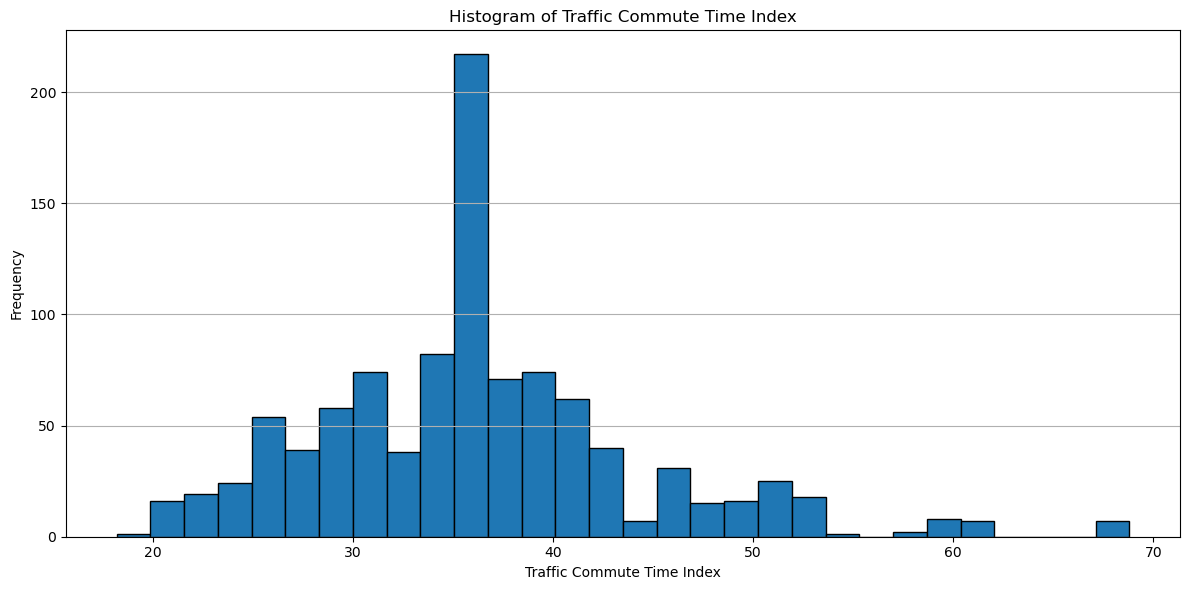

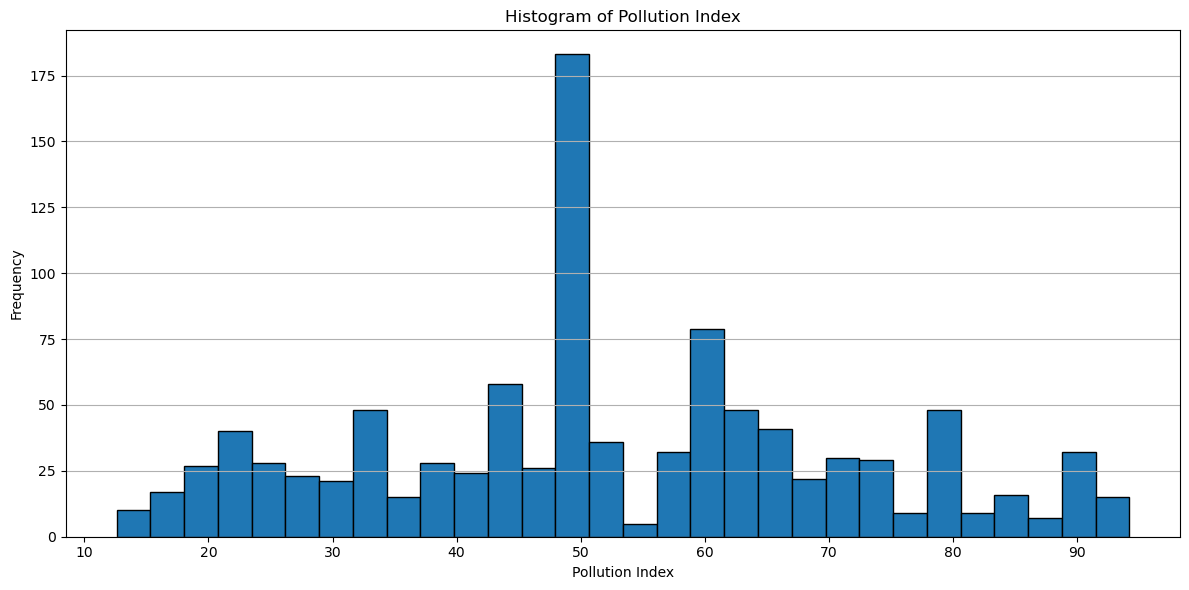

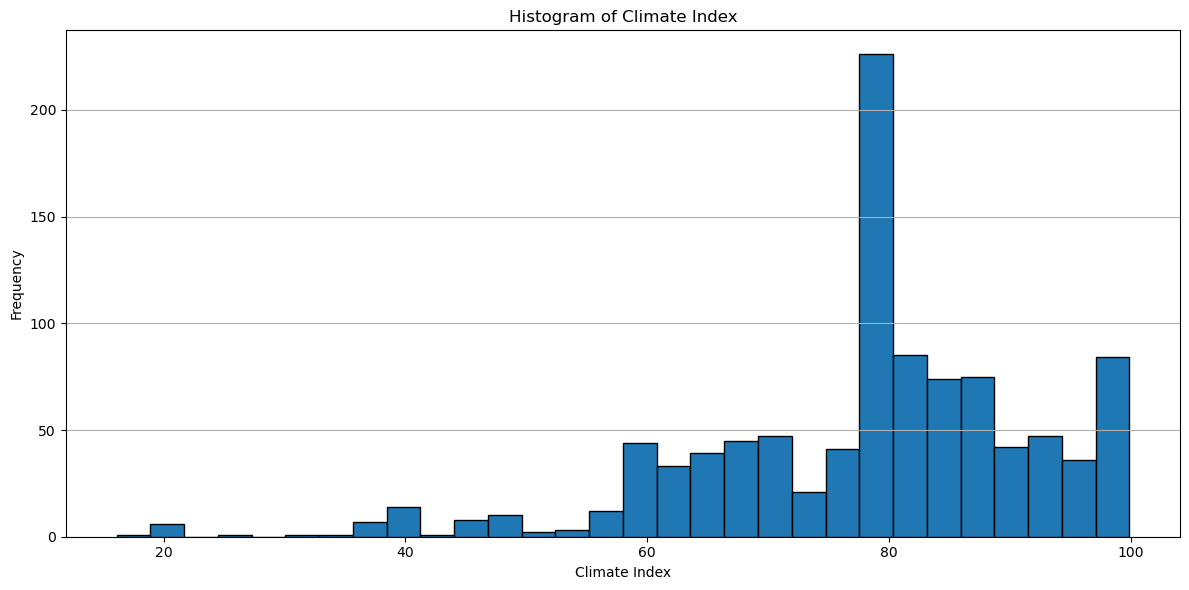

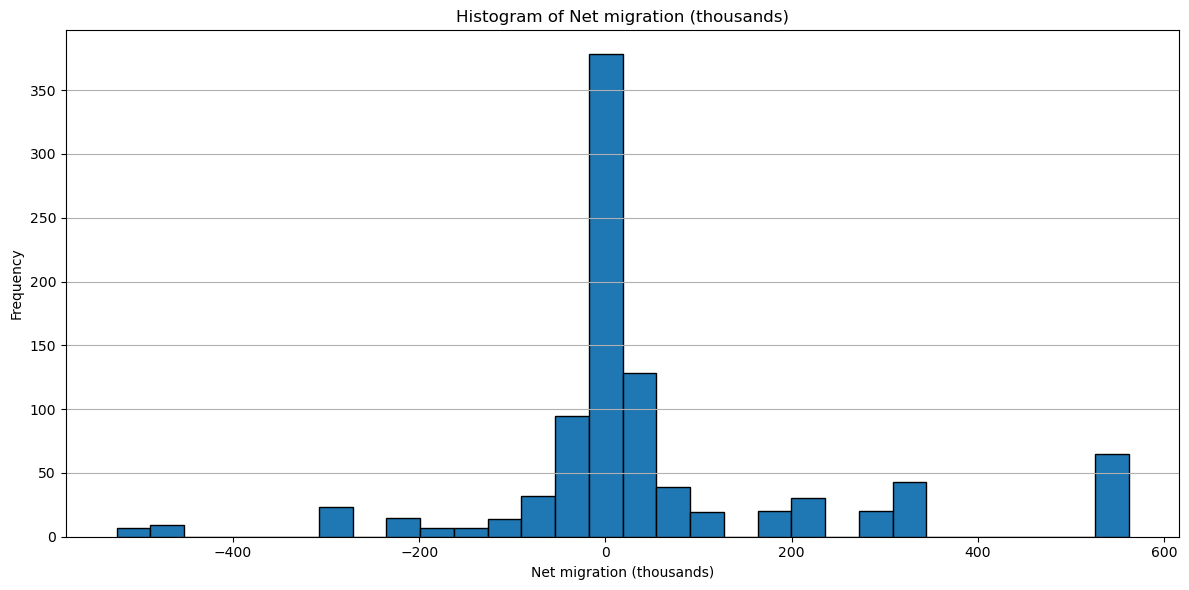

In [ ]:
# Iterate over each numerical column
for col in numerical_cols:
    # Drop NaN values for the current numerical column
    data = result[col].dropna()

    # Plot the histogram
    plt.figure(figsize=(12, 6))
    plt.hist(data, bins=30, edgecolor='black')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(axis='y')  # Add gridlines along the y-axis
    plt.tight_layout()
    plt.show()